### Анализ результатов A/B-теста среди клиентов интернет магазина

Задача:

Подготовить список гипотез для увеличения выручки интернет магазина. Приоритизировать гипотезы. Запустить А/В тест и проанализировать результаты.

In [100]:
#Импортируем библиотеки
import pandas as pd
import numpy as np
from datetime import datetime as dt
from datetime import timedelta
from matplotlib import pyplot as plt
import statistics as stat
import math 
from scipy import stats as st

In [101]:
#Увеличим максимальную длину столбцов
pd.options.display.max_colwidth = 130

### Загрузка данных

In [102]:
#Загружаем данные
try:
    hypothesis, orders, visitors = (
        pd.read_csv('/datasets/hypothesis.csv'), # путь к файлам
        pd.read_csv('/datasets/orders.csv'), 
        pd.read_csv('/datasets/visitors.csv')
                                    )
except:
    try:
         hypothesis, orders, visitors = (
            pd.read_csv('hypothesis.csv'), # локальный путь к файлу
            pd.read_csv('orders.csv'), 
            pd.read_csv('visitors.csv')
                                )
    except:
        hypothesis, orders, visitors = (
            pd.read_csv('https://link'), # интернет ссылка на файл
            pd.read_csv('https://link'), 
            pd.read_csv('https://link')
                            )           

In [103]:
#Отформатируем вывод для численных значений типа float
pd.set_option('display.float_format', '{:,.2f}'.format) 

In [104]:
#Зафиксируем размеры графиков
plt.rcParams["figure.figsize"] = (12,7)

In [105]:
#Посмотрим информацию о таблице гипотез
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [106]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [107]:
#Посмотрим информацию о таблице пользователей
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [108]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [109]:
#Посмотрим информацию о таблице заказов
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [110]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [111]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [112]:
#Поменяем для удобства имена колонок
hypothesis.columns = hypothesis.columns.str.lower()
orders.columns = orders.columns.str.lower()

new_columns = { 
    'transactionid':'transaction_id',
    'visitorid':'visitor_id',
}

#Применяем метод rename для переименования столбцов
hypothesis = hypothesis.rename(columns=new_columns)
orders = orders.rename(columns=new_columns)

print(hypothesis.columns)
orders.columns

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')


Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object')

Посмотрим в первом приближении на данные

In [113]:
#Функция выводит информацию по колонке - название, уникальные значения, количество нулей, распределение значений
def column_describe(data, column):
    print('Column:',column)
    print()
    print('Unique elements: ',data[column].unique())
    print()
    print('Zeroes count:',data[data[column] ==0][column].count())
    display(data[data[column] != data[column].isna()][[column]].describe([.001,.1,.95]).T)
    print('-'*80)
    print()

In [114]:
#Запустим функцию для таблицы hypothesis

for col in hypothesis.columns:
    column_describe(hypothesis, col)

Column: hypothesis

Unique elements:  ['Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей'
 'Запустить собственную службу доставки, что сократит срок доставки заказов'
 'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа'
 'Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар'
 'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей'
 'Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов'
 'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию'
 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'
 'Запустить акцию, дающую скидку на товар в день рождения']

Zeroes count: 0


,count,unique,top,freq
hypothesis,9,9,"Запустить собственную службу доставки, что сократит срок доставки заказов",1


--------------------------------------------------------------------------------

Column: reach

Unique elements:  [ 3  2  8  5 10  1]

Zeroes count: 0


,count,mean,std,min,0.1%,10%,50%,95%,max
reach,9.00,4.78,3.15,1.00,1.01,1.80,3.00,9.20,10.00


--------------------------------------------------------------------------------

Column: impact

Unique elements:  [10  5  3  1  2  7  9]

Zeroes count: 0


,count,mean,std,min,0.1%,10%,50%,95%,max
impact,9.00,4.78,3.19,1.00,1.01,1.80,3.00,9.60,10.00


--------------------------------------------------------------------------------

Column: confidence

Unique elements:  [8 4 7 3 1 2 9]

Zeroes count: 0


,count,mean,std,min,0.1%,10%,50%,95%,max
confidence,9.00,5.56,3.05,1.00,1.01,1.80,7.00,8.60,9.00


--------------------------------------------------------------------------------

Column: efforts

Unique elements:  [ 6 10  3  8  1  5]

Zeroes count: 0


,count,mean,std,min,0.1%,10%,50%,95%,max
efforts,9.00,4.89,2.80,1.00,1.02,2.60,5.00,9.20,10.00


--------------------------------------------------------------------------------



In [115]:
#Запустим функцию для таблицы orders

for col in orders.columns:
    column_describe(orders, col)

Column: transaction_id

Unique elements:  [3667963787 2804400009 2961555356 ... 1807773912 1947021204 3936777065]

Zeroes count: 0


,count,mean,std,min,0.1%,10%,50%,95%,max
transaction_id,"1,197.00","2,155,621,385.53","1,229,084,904.76","1,062,393.00","5,368,758.72","430,055,406.00","2,145,193,898.00","4,067,471,456.20","4,293,855,558.00"


--------------------------------------------------------------------------------

Column: visitor_id

Unique elements:  [3312258926 3642806036 4069496402 ...  370388673  573423106 2108080724]

Zeroes count: 0


,count,mean,std,min,0.1%,10%,50%,95%,max
visitor_id,"1,197.00","2,165,960,143.10","1,236,014,192.15","5,114,589.00","7,221,358.76","407,107,204.60","2,217,984,702.00","4,080,749,199.80","4,283,872,382.00"


--------------------------------------------------------------------------------

Column: date

Unique elements:  ['2019-08-15' '2019-08-16' '2019-08-01' '2019-08-22' '2019-08-17'
 '2019-08-23' '2019-08-02' '2019-08-18' '2019-08-24' '2019-08-03'
 '2019-08-25' '2019-08-28' '2019-08-19' '2019-08-06' '2019-08-26'
 '2019-08-29' '2019-08-04' '2019-08-20' '2019-08-09' '2019-08-07'
 '2019-08-30' '2019-08-05' '2019-08-27' '2019-08-21' '2019-08-08'
 '2019-08-10' '2019-08-31' '2019-08-11' '2019-08-12' '2019-08-13'
 '2019-08-14']

Zeroes count: 0


,count,unique,top,freq
date,1197,31,2019-08-05,48


--------------------------------------------------------------------------------

Column: revenue

Unique elements:  [   1650     730     400    9759    2308    2210    1860    1044   13710
    1855    4008    4499    7370   11985   10980   15277    1060     990
   16490    1190     300    1050     632   15185    7555    3488    7620
    5280     700     190     383    1680   22785    2355    2470    6250
   19260     610    2986    1090    9290    2480    3000    2140    3590
    6990    1250    2970   18100     100    2750     570    2978    1440
    7860   56650     790    1350    2540    1710    2350   14610    8999
   10510   29499     780     890    4400   32350   40740    2490    2080
    5400    5100    4020     690   12350    1290     382    2110    1490
   17868    1940   26550    5970     987    9024    5555    7129    3240
    2995    2550   17600     850    5365    8390    5870    5020   14489
    8470    1630    5800     172    6230     760    3390    4480    1139
   1233

,count,mean,std,min,0.1%,10%,50%,95%,max
revenue,"1,197.00","8,348.01","39,191.13",50.00,50.00,470.00,"2,978.00","28,000.00","1,294,500.00"


--------------------------------------------------------------------------------

Column: group

Unique elements:  ['B' 'A']

Zeroes count: 0


,count,unique,top,freq
group,1197,2,B,640


--------------------------------------------------------------------------------



In [116]:
#Запустим функцию для таблицы visitors

for col in visitors.columns:
    column_describe(visitors, col)

Column: date

Unique elements:  ['2019-08-01' '2019-08-02' '2019-08-03' '2019-08-04' '2019-08-05'
 '2019-08-06' '2019-08-07' '2019-08-08' '2019-08-09' '2019-08-10'
 '2019-08-11' '2019-08-12' '2019-08-13' '2019-08-14' '2019-08-15'
 '2019-08-16' '2019-08-17' '2019-08-18' '2019-08-19' '2019-08-20'
 '2019-08-21' '2019-08-22' '2019-08-23' '2019-08-24' '2019-08-25'
 '2019-08-26' '2019-08-27' '2019-08-28' '2019-08-29' '2019-08-30'
 '2019-08-31']

Zeroes count: 0


,count,unique,top,freq
date,62,31,2019-08-19,2


--------------------------------------------------------------------------------

Column: group

Unique elements:  ['A' 'B']

Zeroes count: 0


,count,unique,top,freq
group,62,2,A,31


--------------------------------------------------------------------------------

Column: visitors

Unique elements:  [719 619 507 717 756 667 644 610 617 406 718 595 748 735 628 361 412 668
 502 575 646 609 468 395 621 722 711 594 577 490 699 713 581 509 770 707
 655 709 654 369 721 543 769 746 544 413 421 737 487 560 656 650 546 378
 679 676 720 531]

Zeroes count: 0


,count,mean,std,min,0.1%,10%,50%,95%,max
visitors,62.00,607.29,114.40,361.00,361.49,413.80,624.50,747.90,770.00


--------------------------------------------------------------------------------



In [117]:
#Проверим полные дубликаты
print(visitors.duplicated().sum())
orders.duplicated().sum()

0


0

In [118]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transaction_id  1197 non-null   int64 
 1   visitor_id      1197 non-null   int64 
 2   date            1197 non-null   object
 3   revenue         1197 non-null   int64 
 4   group           1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [119]:
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


### Предобработка данных

In [120]:
#Посмотрим есть ли дубликаты в колонке "transaction_id"
orders[orders.duplicated(subset=['transaction_id'])]['transaction_id'].count()

0

In [121]:
#Посмотрим есть ли дубликаты в колонке "visitor_id"
orders[orders.duplicated(subset=['visitor_id','group'])]['visitor_id'].count()

108

In [122]:
# Посмотрим пересекаются ли группы A-B в тесте
user_drop_list = (set(orders.query('(group=="A")')['visitor_id'])
&
set(orders.query('(group=="B")')['visitor_id'])
)

user_drop_list

{8300375,
 199603092,
 232979603,
 237748145,
 276558944,
 351125977,
 393266494,
 457167155,
 471551937,
 477780734,
 818047933,
 963407295,
 1230306981,
 1294878855,
 1316129916,
 1333886533,
 1404934699,
 1602967004,
 1614305549,
 1648269707,
 1668030113,
 1738359350,
 1801183820,
 1959144690,
 2038680547,
 2044997962,
 2378935119,
 2458001652,
 2579882178,
 2587333274,
 2600415354,
 2654030115,
 2686716486,
 2712142231,
 2716752286,
 2780786433,
 2927087541,
 2949041841,
 2954449915,
 3062433592,
 3202540741,
 3234906277,
 3656415546,
 3717692402,
 3766097110,
 3803269165,
 3891541246,
 3941795274,
 3951559397,
 3957174400,
 3963646447,
 3972127743,
 3984495233,
 4069496402,
 4120364173,
 4186807279,
 4256040402,
 4266935830}

In [123]:
# Отфильтруем пользователей, общих для двух групп
orders = orders[~orders.visitor_id.isin(user_drop_list)]

In [124]:
#Переведём колонки с датами в соотвествующий тип данных
time_format = '%Y.%m.%d'
visitors['date'] = pd.to_datetime(visitors['date'], format = time_format)
orders['date'] = pd.to_datetime(orders['date'], format = time_format)

In [125]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [126]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1016 non-null   int64         
 1   visitor_id      1016 non-null   int64         
 2   date            1016 non-null   datetime64[ns]
 3   revenue         1016 non-null   int64         
 4   group           1016 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 47.6+ KB


**Выводы**

Пропусков в данных нет, отсутствуют нулевые значения. В таблицах visitors и orders в числовых колонках значительно отличаются медианы и средние, что говорит о наличи выбросов. Дубликатов в таблицах нет, но выявлено персечение пользователей в группах A/B теста. Пересекающиеся пользователи отфильтрованы. Даты приведены к единому формату.

### Приоритизация гипотез

Проведём процедуру приоритизации гипотез

In [127]:
#Расчитаем приоритет гипотез по методу ICE
hypothesis['ice'] = (hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts']
display(hypothesis[['hypothesis','ice']].sort_values(by='ice', ascending=False))

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


In [128]:
#Расчитаем приоритет гипотез по методу RICE
hypothesis['rice'] = (hypothesis['reach']*hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts']
display(hypothesis[['hypothesis','rice']].sort_values(by='rice', ascending=False))

,hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.00
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.00


In [129]:
hypothesis

,hypothesis,reach,impact,confidence,efforts,ice,rice
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.00
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.00
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.00
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.20


**Выводы**

По методу ICE топ гипотез выглядит как 9, 1, 8. По методу RICE - 8,3,1. На смену порядка приоритетов во втором случае влияет параметр Reach, добавляющий оценку охвата пользователей, на которых отразятся изменения. По методу RICE восьмая гипотеза затронет максимальное количество пользователей.

-----------------------------------------------------------------

### Посчитаем кумулятивную выручку

Построим график кумулятивной выручки по группам

In [130]:
#Создадим таблицу с уникальными датами тестов и обозначениями групп
dates_groups = orders[['date', 'group']].drop_duplicates()
dates_groups

,date,group
0,2019-08-15,B
7,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A
...,...,...
1068,2019-08-12,A
1114,2019-08-13,B
1116,2019-08-13,A
1149,2019-08-14,B


In [131]:
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B


In [132]:
#Посчитаем кумулятивные данные по заказам
orders_aggregated = (dates_groups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], 
                                                                     orders['group'] == x['group'])]
                                     .agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 
                                           'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1)
                                    .sort_values(by=['date','group'])
                   )
orders_aggregated.head()

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854


In [133]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [134]:
#Посчитаем кумулятивные данные по посещениям пользователей
visitors_aggregated = (dates_groups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], 
                                                                          visitors['group'] == x['group'])]
                                        .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)
                      .sort_values(by=['date','group'])
                     )
visitors_aggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [135]:
#Объединим таблицы с кумулятивными данными
cumulative_data = (orders_aggregated.merge(visitors_aggregated, left_on=['date', 'group'], 
                                          right_on=['date', 'group'])
)
#Переименуем столбцы
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulative_data.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


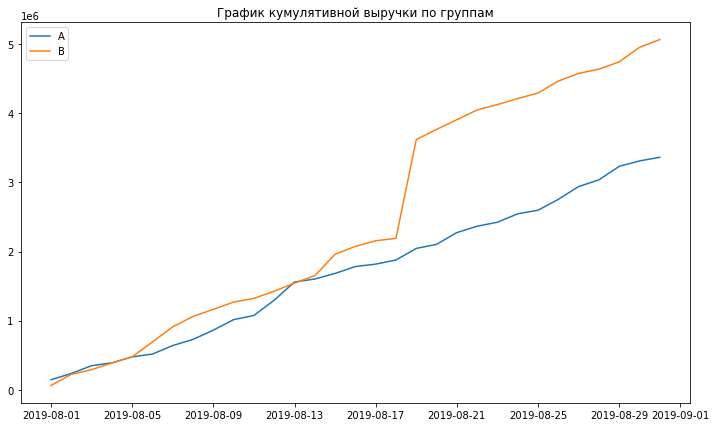

In [136]:
#Таблица с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulative_revenue_a = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]

#Таблица с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulative_revenue_b = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]

#Строим график выручки группы А
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')

#Строим график выручки группы B
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')
plt.title('График кумулятивной выручки по группам')
plt.legend();

**Выводы**

Выручка в обеих группах растёт. В группе **B** выручка стабильно выше, чем в группе **А**. К тому же в группе **В** выручка в определённый момент делает резкий скачок вверх. Это либо увеличение количества заказов, либо совершение пользователями дорогих покупок.

Построим график кумулятивного среднего чека по группам

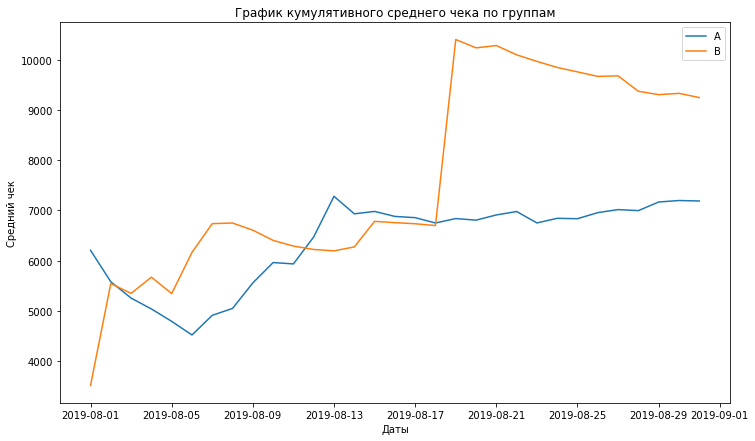

In [137]:
#Таблица с кумулятивным количеством заказов и кумулятивной средним чеком по дням в группе А
cumulative_revenue_a = cumulative_data[cumulative_data['group'] == 'A'][['date', 'revenue', 'orders']]

#Таблица с кумулятивным количеством заказов и кумулятивной средним чеком по дням в группе В
cumulative_revenue_b = cumulative_data[cumulative_data['group'] == 'B'][['date', 'revenue', 'orders']]

#Строим график средних чеков группы А
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'], label='A')

#Строим график средних чеков группы В
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'], label='B')
plt.xlabel('Даты')
plt.ylabel('Средний чек')
plt.title('График кумулятивного среднего чека по группам')
plt.legend();

**Выводы**

В первой половине графика видны резкие скачки среднего чека в обеих группах. Затем графики сглаживаются. На графике среднего чека группы **В**, как и в предыдущем случае виден аномальный скачок.

Построим график относительного изменения кумулятивного среднего чека группы **B** к группе **A**

In [138]:
#Таблица с кумулятивной выручкой по дням в обеих группах
merged_cumulative_revenue = (cumulative_revenue_a.merge(cumulative_revenue_b, left_on='date', 
                                                        right_on='date', 
                                                        how='left', 
                                                        suffixes=['_a', '_b'])
                            )
merged_cumulative_revenue.head()

,date,revenue_a,orders_a,revenue_b,orders_b
0,2019-08-01,142779,23,59758,17
1,2019-08-02,234381,42,221801,40
2,2019-08-03,346854,66,288850,54
3,2019-08-04,388030,77,385740,68
4,2019-08-05,474413,99,475648,89


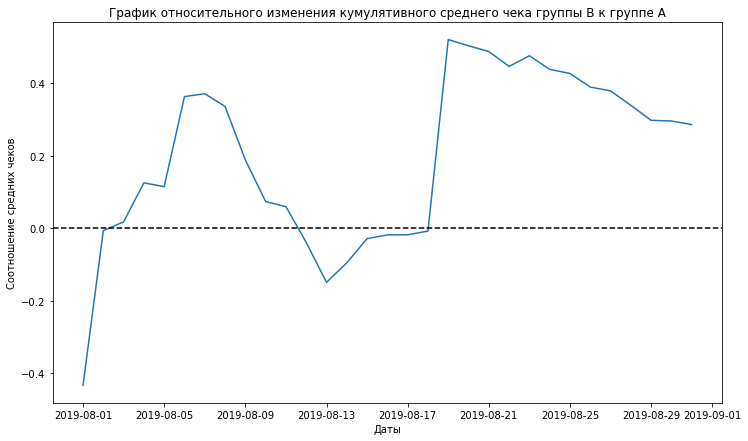

In [139]:
#Строим график отношения средних чеков
plt.plot(merged_cumulative_revenue['date'], 
         (merged_cumulative_revenue['revenue_b']/merged_cumulative_revenue['orders_b'])/
         (merged_cumulative_revenue['revenue_a']/merged_cumulative_revenue['orders_a'])-1)


#Добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Даты')
plt.ylabel('Соотношение средних чеков')
plt.title('График относительного изменения кумулятивного среднего чека группы В к группе А');

**Выводы**

Аналогично предыдущему графику мы видим минимумы и максимумы функции , соответствующие резким скачкам средних чеков в группах.

Построим график кумулятивной конверсии по группам

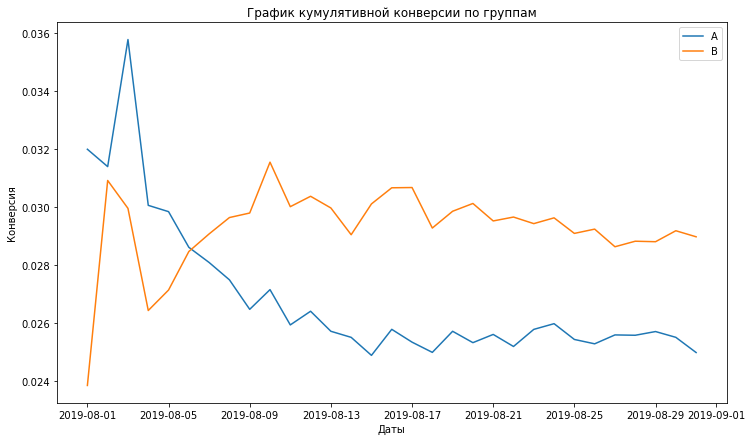

In [140]:
#Посчитаем кумулятивную конверсию
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']

#Выделим данные по группе A
cumulative_data_a = cumulative_data[cumulative_data['group']=='A']

#Выделим данные по группе B
cumulative_data_b = cumulative_data[cumulative_data['group']=='B']

#Построим графики
plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label='A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label='B')
plt.xlabel('Даты')
plt.ylabel('Конверсия')
plt.title('График кумулятивной конверсии по группам')
plt.legend();

**Выводы**

На графике видно, что в начале периода измерений конверсия группы **А** была выше конверсии в группе **В**, однако с накоплением данных показатели выравниваются и сходятся к определённым значениям. Кумулятивная конверсия группы **В** превышает аналогичный показатель в группе **А**.

Построим график относительного изменения кумулятивной конверсии группы B к группе A

In [141]:
#Таблица с кумулятивной конверсией по дням в обеих группах
merged_сumulative_сonversions = (cumulative_data_a[['date','conversion']].
                                                merge(cumulative_data_b[['date','conversion']], 
                                                left_on='date', 
                                                right_on='date', 
                                                how='left', 
                                                suffixes=['_a', '_b'])
                                )

merged_сumulative_сonversions.head()

,date,conversion_a,conversion_b
0,2019-08-01,0.03,0.02
1,2019-08-02,0.03,0.03
2,2019-08-03,0.04,0.03
3,2019-08-04,0.03,0.03
4,2019-08-05,0.03,0.03


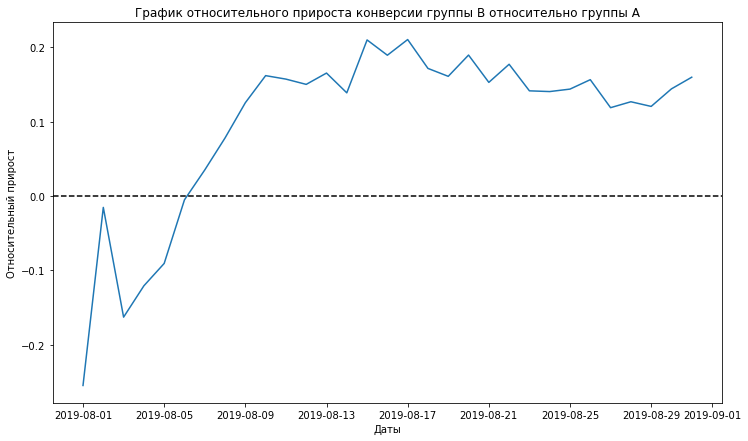

In [142]:
#Построим график относительного прироста конверсии группы B относительно группы A
plt.plot(merged_сumulative_сonversions['date'], merged_сumulative_сonversions['conversion_b']/
         merged_сumulative_сonversions['conversion_a']-1 
        )

plt.title('График относительного прироста конверсии группы B относительно группы A')
plt.xlabel('Даты')
plt.ylabel('Относительный прирост')
plt.axhline(y=0, color='black', linestyle='--');

**Выводы**

Традиционно наблюдаем всплески изменений соотношения в начале графика и затем уверенное выравнивание показателей к определённой величине. По графику видно, что прирост конверсии в группе **В** выше, чем в группе **А**.

Построим точечный график количества заказов по пользователям

In [143]:
#Найдём количество заказов каждого пользователя
orders_per_visitor = orders.groupby('visitor_id').agg({'transaction_id':'count'})

#Переименуем колонки
orders_per_visitor.columns = ['orders_count']
orders_per_visitor.sort_values(by='orders_count', ascending=False ).head()

,orders_count
visitor_id,
3967698036,3
249864742,3
2108163459,3
2988190573,3
3908431265,3


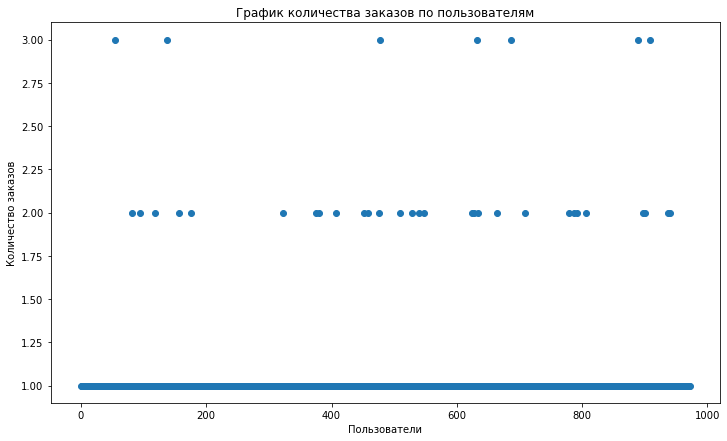

In [144]:
#Сформируем список последовательных чисел соответствующий количеству пользователей 
x_values_opv = pd.Series(range(0, len(orders_per_visitor['orders_count'])))

#Построим точечный график количества заказов по пользователям
plt.scatter(x=x_values_opv, y=orders_per_visitor['orders_count'])
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов')
plt.title('График количества заказов по пользователям');

**Выводы**

В основном пользователи совершают один-два заказа. Точную пропорцию пользователей заказавших больше одного или двух раз надо уточнить. 

Посчитаем 95-й и 99-й перцентили количества заказов на пользователя

In [145]:
#Поместим перцентили в переменную, они нам потом пригодятся
orders_anomaly_border = np.percentile(orders_per_visitor['orders_count'], [95, 99])
#Посмотрим что вышло
print(orders_anomaly_border)

[1. 2.]


Граница для определения аномальных пользователей 95%. Подавляющее большинство покупателей совершает не более 2-х заказов. А более 4-х заказов делает всего 1% клиентов. 

Построим точечный график стоимостей заказов

In [146]:
orders.sort_values(by='revenue', ascending=False).head()

,transaction_id,visitor_id,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
743,3603576309,4133034833,2019-08-09,67990,A


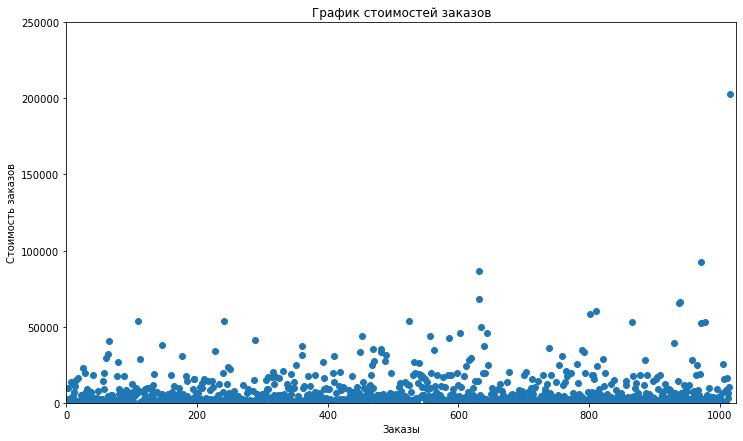

In [165]:
#Сформируем список последовательных чисел соответствующий количеству заказов 
x_values_rev = pd.Series(range(0, len(orders['revenue'])))
plt.xlabel('Заказы')
plt.ylabel('Стоимость заказов')
plt.title('График стоимостей заказов')
plt.scatter(x=x_values_rev, y=orders['revenue'])
plt.axis([0,1025,0,250000]);

**Выводы**

Основное количество заказов плавает в пределах 10-30 тысяч рублей. Редкие заказы превышают сумму в 50 тысяч.

Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов

In [148]:
#Поместим перцентили в переменную, они нам потом пригодятся
revenue_anomaly_border = np.percentile(orders['revenue'], [95, 99])
#Посмотрим что вышло
print(revenue_anomaly_border)

[26785. 53904.]


Уточнили цифры по стоимости, 95% заказов не превышают сумму в 27 тысяч рублей. 1% заказов превышает сумму в 53 тысячи.

### Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным

In [149]:
display(orders.head(1))
visitors.head(1)

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B


,date,group,visitors
0,2019-08-01,A,719


In [150]:
#Выделим пользователей группы А 
visitors_a_daily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_a_daily.columns = ['date', 'visitors_per_date_a']

#Посчитаем кумулятивную сумму пользователей в группе А
visitors_a_cummulative = visitors_a_daily.apply(
    lambda x: visitors_a_daily[visitors_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_a': 'sum'}
    ),
    axis=1)
#Переименуем колонки
visitors_a_cummulative.columns = ['date', 'visitors_cummulative_a']

#Выделим пользователей группы В
visitors_b_daily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_b_daily.columns = ['date', 'visitors_per_date_b']

#Посчитаем кумулятивную сумму пользователей в группе В
visitors_b_cummulative = visitors_b_daily.apply(
    lambda x: visitors_b_daily[visitors_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_b': 'sum'}),axis=1)

#Переименуем колонки
visitors_b_cummulative.columns = ['date', 'visitors_cummulative_b']

#Выделим заказы в группе А 
orders_a_daily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)

#Переименуем колонки
orders_a_daily.columns = ['date', 'orders_per_date_a', 'revenue_per_date_a']

#Посчитаем кумулятивную выручку в группе А
orders_a_cummulative = orders_a_daily.apply(
    lambda x: orders_a_daily[orders_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_a': 'sum', 'revenue_per_date_a': 'sum'}
    ),axis=1).sort_values(by=['date'])

#Переименуем колонки
orders_a_cummulative.columns = ['date','orders_cummulative_a','revenue_cummulative_a']

#Выделим заказы в группе В
orders_b_daily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
#Переименуем колонки
orders_b_daily.columns = ['date', 'orders_per_date_b', 'revenue_per_date_b']

#Посчитаем кумулятивную выручку в группе В
orders_b_cummulative = orders_b_daily.apply(
    lambda x: orders_b_daily[orders_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_b': 'sum', 'revenue_per_date_b': 'sum'}
    ),axis=1).sort_values(by=['date'])

#Переименуем колонки
orders_b_cummulative.columns = ['date','orders_cummulative_b','revenue_cummulative_b']

#Соберём большую таблицу из кумулятивных показателей в обеих группах
data = (
    orders_a_daily.merge(
        orders_b_daily, left_on='date', right_on='date', how='left'
    )
    .merge(orders_a_cummulative, left_on='date', right_on='date', how='left')
    .merge(orders_b_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_a_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_b_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_a_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_b_cummulative, left_on='date', right_on='date', how='left')
)

display(data.head())

,date,orders_per_date_a,revenue_per_date_a,orders_per_date_b,revenue_per_date_b,orders_cummulative_a,revenue_cummulative_a,orders_cummulative_b,revenue_cummulative_b,visitors_per_date_a,visitors_per_date_b,visitors_cummulative_a,visitors_cummulative_b
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


In [151]:
#Посчитаем количество заказов на каждого пользователя в группе А
orders_by_visitors_a = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_visitors_a.columns = ['visitor_id', 'orders']

#Посчитаем количество заказов на каждого пользователя в группе В
orders_by_visitors_b = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_visitors_b.columns = ['visitor_id', 'orders']

#Создадим список c количеством заказов пользователей в группе А
sample_a = (pd.concat([orders_by_visitors_a['orders'],
                       pd.Series(0, index=np.arange(data['visitors_per_date_a'].sum() - 
                                                    len(orders_by_visitors_a['orders'])), name='orders')],axis=0)
           )
#Создадим список c количеством заказов пользователей в группе В
sample_b = (pd.concat([orders_by_visitors_b['orders'],
                       pd.Series(0, index=np.arange(data['visitors_per_date_b'].sum() - 
                                                    len(orders_by_visitors_b['orders'])), name='orders')],axis=0)
           )

In [152]:
orders_by_visitors_b

,visitor_id,orders
0,5114589,1
1,6958315,1
2,39475350,1
3,47206413,1
4,48147722,1
...,...,...
523,4251115836,1
524,4258103007,1
525,4279090005,1
526,4281247801,1


In [153]:
sample_a 

0        1
1        1
2        1
3        1
4        1
        ..
18286    0
18287    0
18288    0
18289    0
18290    0
Name: orders, Length: 18736, dtype: int64

Проверим гипотезу о различии конверсий групп А и В на "сырых" данных.

Сформулируем её так:

1) Нулевая гипотеза H0 - Конверсии групп А и В не имеют статистически значимого различия

2) Альтернативная гипотеза H1 - Конверсии групп А и В имеют статистически значимое различие


In [154]:
#Запишем результат теста в переменную
mannwitney_result = st.mannwhitneyu(sample_a, sample_b)[1]

if mannwitney_result < 0.05:
    print("p-value = {0:.3f}".format(mannwitney_result))
    print("Отвергаем нулевую гипотезу")
else:
    print("p-value = {0:.3f}".format(mannwitney_result))
    print("Не получилось отвергнуть нулевую гипотезу") 

#Посчитаем относительное различие конверсий в группах    
print("Относительное различие конверсии в группе = {0:.3f}".format(sample_b.mean() / sample_a.mean() - 1))    

p-value = 0.006
Отвергаем нулевую гипотезу
Относительное различие конверсии в группе = 0.160


**Выводы**

Согласно результатам теста Манна-Уитни конверсии в группах различаются. Конверсия в группе **В** на 16% выше, чем в группе **А**.

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

---------------------------------

Проверим гипотезу о различии средних чеков групп А и В на "сырых" данных.

Сформулируем гипотезу так:

1) Нулевая гипотеза H0 - Средние чеки групп А и В не имеют статистически значимого различия

2) Альтернативная гипотеза H1 -  Средние чеки групп А и В имеют статистически значимое различие


In [155]:
#Запишем результат теста в переменную
mannwitney_result = st.mannwhitneyu(orders[orders['group']=='A']['revenue'],
                                    orders[orders['group']=='B']['revenue'])[1]

if mannwitney_result < 0.05:
    print("p-value = {0:.3f}".format(mannwitney_result))
    print("Отвергаем нулевую гипотезу")
else:
    print("p-value = {0:.3f}".format(mannwitney_result))
    print("Не получилось отвергнуть нулевую гипотезу") 

#Посчитаем относительное различие средних чеков в группах    
print("Относительное различие среднего чека в группе = {0:.3f}".
      format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))  

p-value = 0.415
Не получилось отвергнуть нулевую гипотезу
Относительное различие среднего чека в группе = 0.287


**Выводы**

Несмотря на то, что по сырым данным средний чек в группе **В** выше среднего чека в группе **А** на 28%, по результатам теста Манна-Уитни статистически значимого различия в средних чеках нет.  

### Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным

Для выделения пользователей с аномально большим количеством заказов воспользуемся ранее созданными переменными "orders_anomaly_border" и "revenue_anomaly_border"

In [156]:
#Выделим пользователей с аномально большим количеством заказов 
users_with_many_orders = pd.concat(
    [   orders_by_visitors_a[orders_by_visitors_a['orders'] > orders_anomaly_border[0]]['visitor_id'],
        orders_by_visitors_b[orders_by_visitors_b['orders'] > orders_anomaly_border[0]]['visitor_id'],
    ],
    axis=0,
)
#Выделим пользователей с аномально высокой стоимостью заказов
users_with_expensive_orders = orders[orders['revenue'] > revenue_anomaly_border[0]]['visitor_id']

#Объединим их в одну таблицу
abnormal_users = (
    pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)
display(users_with_expensive_orders.head())

73     2947100995
77      787824685
78     3288820196
131    2254586615
137    1211585711
Name: visitor_id, dtype: int64

In [157]:
#Создадим массив очищенный от аномальных пользователей в группе А
sample_a_filtered = pd.concat([orders_by_visitors_a[np.logical_not(orders_by_visitors_a['visitor_id'].
                                                                   isin(abnormal_users))]['orders'],
        pd.Series(0,index=np.arange(data['visitors_per_date_a'].sum() - len(orders_by_visitors_a['orders'])
            ),name='orders')],axis=0)

#Создадим массив очищенный от аномальных пользователей в группе В
sample_b_filtered = pd.concat([orders_by_visitors_b[np.logical_not(orders_by_visitors_b['visitor_id'].
                                                                   isin(abnormal_users))]['orders'],
        pd.Series(0,index=np.arange(data['visitors_per_date_a'].sum() - len(orders_by_visitors_b['orders'])
            ),name='orders')],axis=0)


Проверим гипотезу о различии конверсий групп А и В на очищенных данных.

Сформулируем её так:

1) Нулевая гипотеза H0 - Конверсии групп А и В не имеют статистически значимого различия

2) Альтернативная гипотеза H1 - Конверсии групп А и В имеют статистически значимое различие


In [158]:
#Запишем результат теста в переменную
mannwitney_result = st.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1]

if mannwitney_result < 0.05:
    print("p-value = {0:.3f}".format(mannwitney_result))
    print("Отвергаем нулевую гипотезу")
else:
    print("p-value = {0:.3f}".format(mannwitney_result))
    print("Не получилось отвергнуть нулевую гипотезу") 

#Посчитаем относительное различие конверсий в группах     
print("Относительное различие конверсии в группе = {0:.3f}".
      format(sample_b_filtered.mean() / sample_a_filtered.mean() - 1))        

p-value = 0.005
Отвергаем нулевую гипотезу
Относительное различие конверсии в группе = 0.185


**Выводы**

Согласно результатам теста Манна-Уитни на очищенных данных конверсии в группах тоже различаются. Конверсия в группе **В** на 18,5% выше, чем в группе **А**.

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по очищенным данным

Проверим гипотезу о различии средних чеков групп А и В на очищенных данных.

Сформулируем её так:

1) Нулевая гипотеза H0 - Средние чеки групп А и В не имеют статистически значимого различия

2) Альтернативная гипотеза H1 -  Средние чеки групп А и В имеют статистически значимое различие

In [159]:
#Запишем результат теста в переменную
mannwitney_result = st.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue'],
                                       orders[np.logical_and(orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue'])[1]

if mannwitney_result < 0.05:
    print("p-value = {0:.3f}".format(mannwitney_result))
    print("Отвергаем нулевую гипотезу")
else:
    print("p-value = {0:.3f}".format(mannwitney_result))
    print("Не получилось отвергнуть нулевую гипотезу") 

#Посчитаем относительное различие среднего чека в группах
print("Относительное различие среднего чека в группе = {0:.3f}".
                  format(orders[np.logical_and(orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
            )]['revenue'].mean() / orders[np.logical_and(orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),)]['revenue'].mean()- 1))

p-value = 0.364
Не получилось отвергнуть нулевую гипотезу
Относительное различие среднего чека в группе = -0.034


**Выводы**

По очищенным данным разницы в средних чеках между группами нет, относительное различие в средних чеках изменилось в обратную сторону и составляет 3,4% в пользу группы **А**.

--------------------------------------------------

### Общие выводы

Пользователи совершают в среднем один-два заказа. Стоимость заказов обычно не превышает 27 тысяч рублей. 
Выручка в обеих группах растёт. 
В датасете присутствуют выбросы и скачки спроса. Из-за чего в процессе проверки гипотез пришлось очищать данные.
Тем не менее решающего влияния на результаты статистических тестов выбросы не оказали.

Средние чеки в группах не отличаются, однако за счёт более высокой конверсии выручка в группе **B** стабильно выше, чем в группе **А**. 


**Заключительное решение:**

Выбран вариант 1. Остановить тест и зафиксировать победу одной из групп.
    
а) Тест останавливаем, поскольку на протяжении всего времени наблюдений зафиксирована стабилизация кумулятивных показателей. 
    
б) В результате всех тестов наилучшие показатели выручки зарегистрированы в группе **В**. 